<a href="https://colab.research.google.com/github/Yousef-Shihade/IR-projects/blob/main/OCR_Robust_IR_Char3Grams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Documents: 30

 Query examples (clean -> noisy):
  european capital city  ->  eur0pen c@pi7al city
  central market square  ->  (entrral m@rket square
  medieval old town  ->  med1eval old town

QUERY (clean): european capital city
QUERY (noisy): eur0pen c@pi7al city

Top docs (CLEAN query):


,Rank,DocID,CosineSim,Snippet
0,1,12,0.2943,Brussels is the capital of Belgium and hosts m...
1,2,6,0.1667,Athens is the capital of Greece and connects a...
2,3,20,0.1374,Zurich is a major Swiss city with financial ce...
3,4,11,0.1293,Amsterdam is the capital of the Netherlands an...
4,5,26,0.0980,"Istanbul has gr@nd bazaars and large markets, ..."
5,6,18,0.0755,Edinburgh is the capital of Scotland with an o...



Top docs (OCR-NOISY query):


,Rank,DocID,CosineSim,Snippet
0,1,20,0.1538,Zurich is a major Swiss city with financial ce...
1,2,6,0.1422,Athens is the capital of Greece and connects a...
2,3,3,0.1092,Romee iss the capital of I7aly with aancient r...
3,4,11,0.0951,Amsterdam is the capital of the Netherlands an...
4,5,14,0.0893,Copenhagen is the capital of Denmark with colo...
5,6,21,0.0757,6arcelona is a major Sp@nish city with famous ...


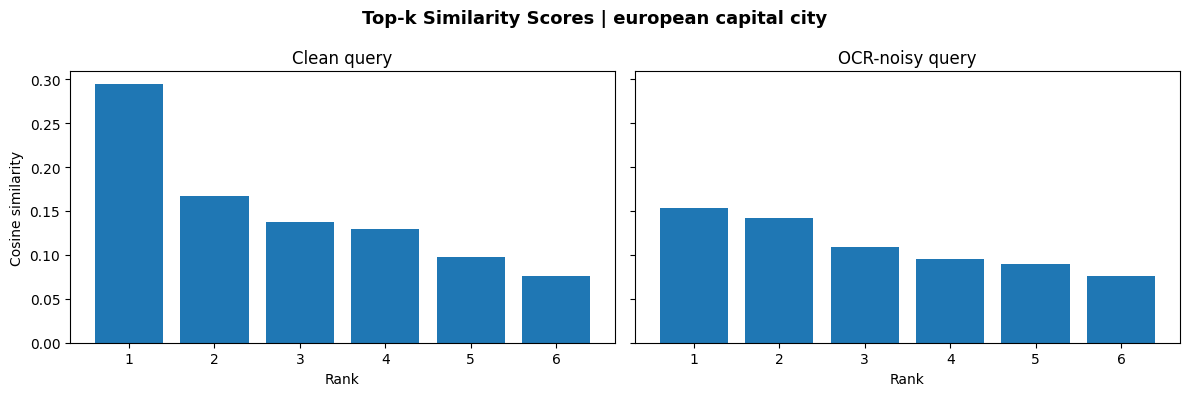


QUERY (clean): central market square
QUERY (noisy): (entrral m@rket square

Top docs (CLEAN query):


,Rank,DocID,CosineSim,Snippet
0,1,22,0.3927,Krakow has a well-preserved old town and a lar...
1,2,29,0.2608,Prague old town has cobblestone streets and a ...
2,3,24,0.2428,Riga has an old town and a central market know...
3,4,8,0.1592,Prague is the capital of the Czech Republic wi...
4,5,15,0.1285,Helsinki is the capital of Finland with modern...
5,6,27,0.1159,Munich has traditional beer halls and seaasona...



Top docs (OCR-NOISY query):


,Rank,DocID,CosineSim,Snippet
0,1,22,0.3585,Krakow has a well-preserved old town and a lar...
1,2,29,0.2407,Prague old town has cobblestone streets and a ...
2,3,24,0.1875,Riga has an old town and a central market know...
3,4,8,0.1744,Prague is the capital of the Czech Republic wi...
4,5,15,0.0841,Helsinki is the capital of Finland with modern...
5,6,26,0.0793,"Istanbul has gr@nd bazaars and large markets, ..."


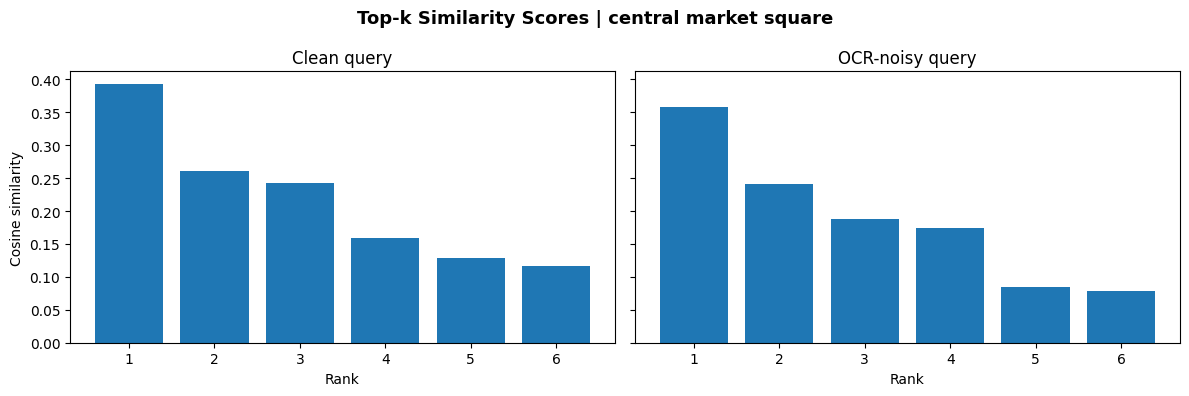


QUERY (clean): medieval old town
QUERY (noisy): med1eval old town

Top docs (CLEAN query):


,Rank,DocID,CosineSim,Snippet
0,1,19,0.4110,Bern is the capital of Switzerland with a medi...
1,2,8,0.3819,Prague is the capital of the Czech Republic wi...
2,3,23,0.3752,Tallinn has a medieval old town with stone wal...
3,4,18,0.1671,Edinburgh is the capital of Scotland with an o...
4,5,24,0.1500,Riga has an old town and a central market know...
5,6,9,0.1497,Warsaw is the capital of Poland with a rebuilt...



Top docs (OCR-NOISY query):


,Rank,DocID,CosineSim,Snippet
0,1,19,0.3481,Bern is the capital of Switzerland with a medi...
1,2,23,0.3254,Tallinn has a medieval old town with stone wal...
2,3,8,0.3207,Prague is the capital of the Czech Republic wi...
3,4,24,0.1797,Riga has an old town and a central market know...
4,5,9,0.1794,Warsaw is the capital of Poland with a rebuilt...
5,6,18,0.1613,Edinburgh is the capital of Scotland with an o...


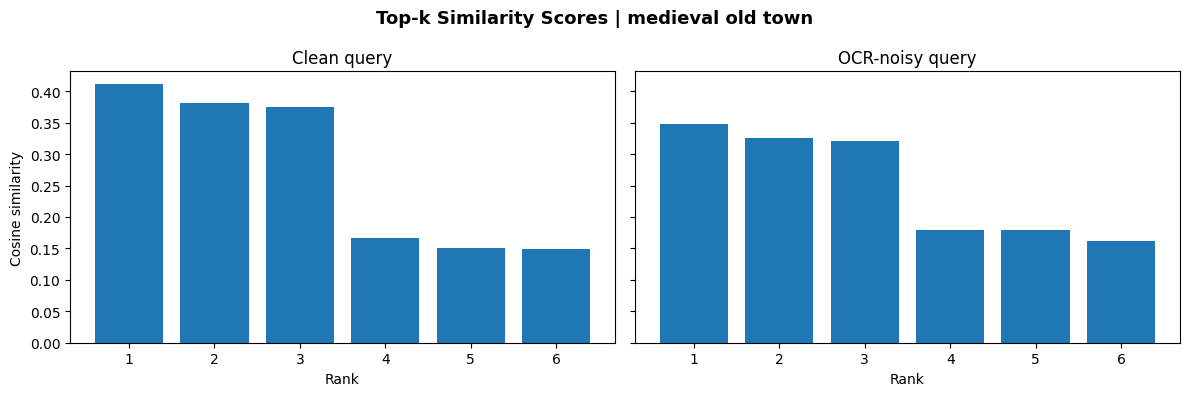


 Summary : 


,Query,MeanTop6_Clean,MeanTop6_Noisy
0,european capital city,0.150200,0.110883
1,central market square,0.216650,0.187417
2,medieval old town,0.272483,0.252433


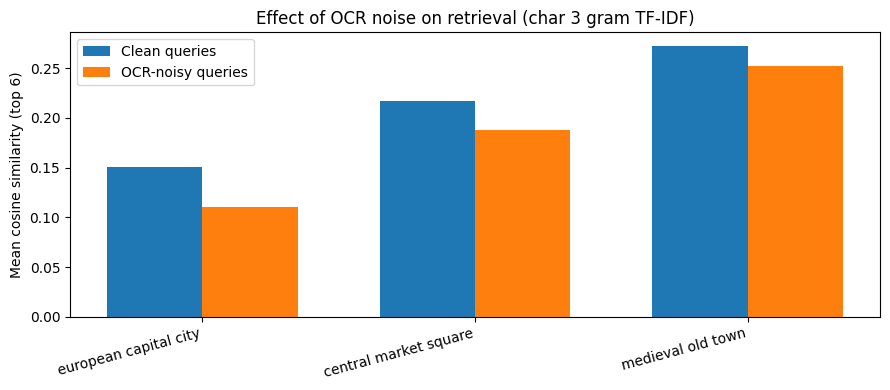

In [2]:
#  Yousef Shihade

#  OCR & IR : Europe topic (capitals / markets / old towns)

!pip -q install scikit-learn pandas matplotlib

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

random.seed(42)
np.random.seed(42)

# Corpus: Europe (capitals, markets, old towns)
docs_clean = [
    "Paris is the capital of France and is famous for museums, cafes, and the Seine river.",
    "London is the capital of the United Kingdom with historic landmarks and large public transport networks.",
    "Berlin is the capital of Germany and has many memorials, museums, and modern culture districts.",
    "Rome is the capital of Italy with ancient ruins, piazzas, and major historical sites.",
    "Madrid is the capital of Spain and is known for art museums and lively food markets.",
    "Lisbon is the capital of Portugal and has hills, trams, and traditional marketplaces.",
    "Athens is the capital of Greece and connects ancient history with modern city life.",
    "Vienna is the capital of Austria and is known for classical music, palaces, and coffee culture.",
    "Prague is the capital of the Czech Republic with a famous old town square and medieval streets.",
    "Warsaw is the capital of Poland with a rebuilt old town and modern business centers.",
    "Budapest is the capital of Hungary with thermal baths and a historic riverside skyline.",
    "Amsterdam is the capital of the Netherlands and has canals, bike culture, and city markets.",
    "Brussels is the capital of Belgium and hosts many European Union institutions.",
    "Stockholm is the capital of Sweden built across islands with waterfront promenades and old town areas.",
    "Copenhagen is the capital of Denmark with colorful harbors and well-designed public spaces.",
    "Helsinki is the capital of Finland with modern architecture and coastal markets near the center.",
    "Oslo is the capital of Norway with museums and access to forests and fjords nearby.",
    "Dublin is the capital of Ireland with historic streets and lively pubs and markets.",
    "Edinburgh is the capital of Scotland with an old town, castle views, and narrow closes.",
    "Bern is the capital of Switzerland with a medieval old town and arcaded shopping streets.",
    "Zurich is a major Swiss city with financial centers and weekend food markets.",
    "Barcelona is a major Spanish city with famous markets like La Boqueria and historic neighborhoods.",
    "Krakow has a well-preserved old town and a large central market square called Rynek Glowny.",
    "Tallinn has a medieval old town with stone walls, towers, and compact walking streets.",
    "Riga has an old town and a central market known for local food halls and fresh produce.",
    "Florence has historic streets and markets, and it is famous for Renaissance art and architecture.",
    "Istanbul has grand bazaars and large markets, bridging Europe and Asia with historic quarters.",
    "Munich has traditional beer halls and seasonal markets, including Christmas markets in winter.",
    "Vienna markets include Naschmarkt, popular for fresh produce, street food, and small restaurants.",
    "Prague old town has cobblestone streets and a central square with historic buildings and churches.",
]
print(f"Documents: {len(docs_clean)}")

SUBS = {
    'o': '0', 'i': '1', 'e': '3', 'a': '@', 's': '5', 't': '7',
    'l': '1', 'b': '6', 'g': '9', 'c': '(', 'u': 'v'
}

def add_ocr_noise(text, p_sub=0.06, p_del=0.015, p_ins=0.012):
    """Simulate OCR errors by substitution/deletion/insertion at character level."""
    out = []
    for ch in text:
        if ch.isalpha() and random.random() < p_del:
            continue
        if random.random() < p_sub:
            low = ch.lower()
            if low in SUBS:
                ch = SUBS[low] if ch.islower() else SUBS[low].upper()
        out.append(ch)
        if ch.isalpha() and random.random() < p_ins:
            out.append(ch)
    return ''.join(out)

docs_noisy = [add_ocr_noise(d) if random.random() < 0.45 else d for d in docs_clean]

# Queries + force OCR-noisy version
queries_clean = [
    "european capital city",
    "central market square",
    "medieval old town",
]

def make_noisy_query(q: str) -> str:
    """Ensure the query is actually changed by OCR noise (important for clear comparison)."""
    noisy = add_ocr_noise(q, p_sub=0.10, p_del=0.02, p_ins=0.02)
    while noisy == q:  # with at least one change
        noisy = add_ocr_noise(q, p_sub=0.15, p_del=0.03, p_ins=0.03)
    return noisy

queries_noisy = [make_noisy_query(q) for q in queries_clean]

print("\n Query examples (clean -> noisy):")
for qc, qn in zip(queries_clean, queries_noisy):
    print(f"  {qc}  ->  {qn}")

# Indexing: character q-grams (q=3) with TF-IDF
vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(3, 3), lowercase=True)
X_docs = vectorizer.fit_transform(docs_noisy)

def rank_docs(query_text, top_k=6):
    q_vec = vectorizer.transform([query_text])
    sims = cosine_similarity(q_vec, X_docs)[0]
    order = np.argsort(sims)[::-1][:top_k]
    return order, sims

def make_table(order, sims):
    rows = []
    for r, idx in enumerate(order, start=1):
        rows.append({
            "Rank": r,
            "DocID": int(idx),
            "CosineSim": float(np.round(sims[idx], 4)),
            "Snippet": docs_noisy[idx][:95] + ("..." if len(docs_noisy[idx]) > 95 else "")
        })
    return pd.DataFrame(rows)

def plot_side_by_side(df_clean, df_noisy, query_label):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    fig.suptitle(f"Top-k Similarity Scores | {query_label}", fontsize=13, fontweight="bold")

    axes[0].bar(df_clean["Rank"], df_clean["CosineSim"])
    axes[0].set_title("Clean query")
    axes[0].set_xlabel("Rank")
    axes[0].set_ylabel("Cosine similarity")
    axes[0].set_xticks(df_clean["Rank"])

    axes[1].bar(df_noisy["Rank"], df_noisy["CosineSim"])
    axes[1].set_title("OCR-noisy query")
    axes[1].set_xlabel("Rank")
    axes[1].set_xticks(df_noisy["Rank"])

    plt.tight_layout()
    plt.show()

# Run retrieval +  results
summary_rows = []

for qc, qn in zip(queries_clean, queries_noisy):
    print("\n" + "="*120)
    print(f"QUERY (clean): {qc}")
    print(f"QUERY (noisy): {qn}")

    order_c, sims_c = rank_docs(qc, top_k=6)
    order_n, sims_n = rank_docs(qn, top_k=6)

    df_c = make_table(order_c, sims_c)
    df_n = make_table(order_n, sims_n)

    print("\nTop docs (CLEAN query):")
    display(df_c)

    print("\nTop docs (OCR-NOISY query):")
    display(df_n)

    plot_side_by_side(df_c, df_n, query_label=qc)

    summary_rows.append({
        "Query": qc,
        "MeanTop6_Clean": df_c["CosineSim"].mean(),
        "MeanTop6_Noisy": df_n["CosineSim"].mean()
    })

#  summary plot
summary_df = pd.DataFrame(summary_rows)
print("\n Summary : ")
display(summary_df)

x = np.arange(len(summary_df))
w = 0.35

fig, ax = plt.subplots(figsize=(9, 4))
ax.bar(x - w/2, summary_df["MeanTop6_Clean"], w, label="Clean queries")
ax.bar(x + w/2, summary_df["MeanTop6_Noisy"], w, label="OCR-noisy queries")
ax.set_xticks(x)
ax.set_xticklabels(summary_df["Query"], rotation=15, ha="right")
ax.set_ylabel("Mean cosine similarity (top 6)")
ax.set_title("Effect of OCR noise on retrieval (char 3 gram TF-IDF)")
ax.legend()
plt.tight_layout()
plt.show()

**Objective**

The goal of this project is to evaluate the robustness of Information Retrieval methods to OCR errors by indexing documents and queries using character-based q-grams and measuring similarity with cosine similarity.

--------------------------------------------------------------

**Dataset**

We created 30 short documents on a single coherent topic: Europe, focusing on capital cities, central markets, and medieval old towns.

All documents are textual and comparable in length and style.

--------------------------------------------------------------

**OCR Error Simulation**

simulate OCR noise:

We introduced character-level errors including:

    Substitutions (e.g., a → @, o → 0, t → 7)

    Deletions (random character removal)

    Insertions (character duplication)

OCR noise was applied to:

    ~45% of the documents

    All queries, with at least one guaranteed OCR error per query

Examples of OCR errors are shown in the notebook (e.g., eur0pen c@pi7al city, med1eval old town).

--------------------------------------------------------------

**Queries**

We defined three queries, each consisting of exactly 3 words, as required:

    european capital city

    central market square

    medieval old town

For each query, an OCR-noisy version was generated and evaluated.


--------------------------------------------------------------


**Indexing Method (q-grams)**

Documents and queries were indexed using character 3-grams (q = 3).

TF-IDF weighting was applied over the 3-gram vocabulary.

Character-level q-grams were chosen to improve robustness to OCR errors.

--------------------------------------------------------------

**Similarity Measure**

For each query (clean and OCR-noisy), we computed cosine similarity between the query vector and all document vectors.

Documents were ranked by similarity, and the top-k (k = 6) most similar documents were retrieved.

--------------------------------------------------------------

**Results Presentation**

For each query, we present:

    A table of the top-6 retrieved documents with similarity scores.

    Bar charts comparing similarity scores for clean vs OCR-noisy queries.

Additionally, we present a summary plot comparing the mean cosine similarity (top-6) for clean and noisy queries across all queries.

--------------------------------------------------------------

**Observations**

OCR noise consistently reduces cosine similarity scores.

Character 3-gram indexing remains effective in retrieving relevant documents even under OCR corruption.

In some cases, document ranking changes slightly, but relevant documents remain highly ranked.

--------------------------------------------------------------

**Conclusion**

This experiment demonstrates that character-based q-gram indexing combined with cosine similarity provides robustness against OCR errors in Information Retrieval systems.